In [32]:
%load_ext autoreload
%autoreload 2
p = print
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Input, Flatten, Activation
from keras.regularizers import l2
from keras.optimizers import Adam
from keras_self_attention import SeqSelfAttention

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
def make_attentive_model(tx: int, num_channels: int, ty:int, 
                         num_lstm_hidden=128, attention_width=12) -> Model:
    inputs = Input(shape=(tx, num_channels))
    X = LSTM(
        units=num_lstm_hidden, 
        return_sequences=True, 
        bias_initializer='zeros',
    )(inputs)
    X = SeqSelfAttention(
        units=32,
        attention_width=attention_width,
        attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
        return_attention=False,
        history_only=False,
        kernel_initializer='glorot_normal',
        bias_initializer='zeros',
        kernel_regularizer=l2(1e-6),
        bias_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None,
        use_additive_bias=True,
        use_attention_bias=True,
        attention_activation=None,
        attention_regularizer_weight=0.0,
    )(X)
    X = Flatten()(X)
    X = Dense(
        units=ty, 
        bias_initializer='zeros',
    )(X)
#     X = Activation('linear')(X)
    model = Model(inputs=inputs, outputs=X)
    return model

In [51]:
# def build_structured_self_attention_embedder(word_window_size, num_features,
#                                              hidden_state_size, num_layers, attention_filters1, attention_filters2,
#                                              dropout, recurrent_dropout, regularization_lambda):
#     # Input for text sequence
#     sequence_input = Input(shape=(word_window_size, num_features, ), name="sequence_input_placeholder")

# #     # Word embeddings lookup for words in sequence
# #     sequence_word_embeddings = Embedding(input_dim=vocabulary_size + 1,
# #                                          output_dim=word_embedding_size,
# #                                          embeddings_initializer='glorot_uniform',
# #                                          embeddings_regularizer=l2(regularization_lambda),
# #                                          mask_zero=True,
# #                                          name="sequence_word_embeddings")(sequence_input)

#     # Obtain hidden state of Bidirectional LSTM at each word embedding
#     hidden_states = Dense(8, kernel_initializer='glorot_uniform', use_bias=True, bias_initializer='zeros')(sequence_input)
#     for layer in range(num_layers):
#         hidden_states = Bidirectional(LSTM(units=hidden_state_size,
#                                            dropout=dropout,
#                                            recurrent_dropout=recurrent_dropout,
#                                            kernel_initializer='glorot_uniform',
#                                            recurrent_initializer='glorot_uniform',
#                                            use_bias=True,
#                                            bias_initializer='zeros',
#                                            kernel_regularizer=l2(regularization_lambda),
#                                            recurrent_regularizer=l2(regularization_lambda),
#                                            bias_regularizer=l2(regularization_lambda),
#                                            activity_regularizer=l2(regularization_lambda),
#                                            implementation=1,
#                                            return_sequences=True,
#                                            return_state=False,
#                                            unroll=True),
#                                       merge_mode='concat', name="lstm_outputs_{}".format(layer))(hidden_states)

#     # Attention mechanism
#     attention = Conv1D(filters=attention_filters1, kernel_size=1, activation='tanh', padding='same', 
#                        use_bias=True,
#                        kernel_initializer='glorot_uniform', 
#                        bias_initializer='zeros',
#                        kernel_regularizer=l2(regularization_lambda),
#                        bias_regularizer=l2(regularization_lambda), activity_regularizer=l2(regularization_lambda),
#                        name="attention_layer1")(hidden_states)
#     attention = Conv1D(filters=attention_filters2, kernel_size=1, activation='linear', padding='same', 
#                        use_bias=True,
#                        kernel_initializer='glorot_uniform', 
#                        bias_initializer='zeros',
#                        kernel_regularizer=l2(regularization_lambda),
#                        bias_regularizer=l2(regularization_lambda), activity_regularizer=l2(regularization_lambda),
#                        name="attention_layer2")(attention)
#     attention = Lambda(lambda x: softmax(x, axis=1), name="attention_vector")(attention)

#     # Apply attention weights
#     weighted_sequence_embedding = Dot(axes=[1, 1], normalize=False, name="weighted_sequence_embedding")(
#         [attention, hidden_states])

#     # Add and normalize to obtain final sequence embedding
#     sequence_embedding = Flatten()(weighted_sequence_embedding)
#     sequence_embedding = Dense(1, kernel_initializer='normal', use_bias=False, activation='linear')(sequence_embedding)

#     # Build model
#     model = Model(inputs=sequence_input, outputs=sequence_embedding, name="sequence_embedder")
#     model.summary()
#     return model


(7286, 73)
['var1(t-72)' 'var1(t-71)' 'var1(t-70)' 'var1(t-69)' 'var1(t-68)'
 'var1(t-67)' 'var1(t-66)' 'var1(t-65)' 'var1(t-64)' 'var1(t-63)'
 'var1(t-62)' 'var1(t-61)' 'var1(t-60)' 'var1(t-59)' 'var1(t-58)'
 'var1(t-57)' 'var1(t-56)' 'var1(t-55)' 'var1(t-54)' 'var1(t-53)'
 'var1(t-52)' 'var1(t-51)' 'var1(t-50)' 'var1(t-49)' 'var1(t-48)'
 'var1(t-47)' 'var1(t-46)' 'var1(t-45)' 'var1(t-44)' 'var1(t-43)'
 'var1(t-42)' 'var1(t-41)' 'var1(t-40)' 'var1(t-39)' 'var1(t-38)'
 'var1(t-37)' 'var1(t-36)' 'var1(t-35)' 'var1(t-34)' 'var1(t-33)'
 'var1(t-32)' 'var1(t-31)' 'var1(t-30)' 'var1(t-29)' 'var1(t-28)'
 'var1(t-27)' 'var1(t-26)' 'var1(t-25)' 'var1(t-24)' 'var1(t-23)'
 'var1(t-22)' 'var1(t-21)' 'var1(t-20)' 'var1(t-19)' 'var1(t-18)'
 'var1(t-17)' 'var1(t-16)' 'var1(t-15)' 'var1(t-14)' 'var1(t-13)'
 'var1(t-12)' 'var1(t-11)' 'var1(t-10)' 'var1(t-9)' 'var1(t-8)'
 'var1(t-7)' 'var1(t-6)' 'var1(t-5)' 'var1(t-4)' 'var1(t-3)' 'var1(t-2)'
 'var1(t-1)' 'var1(t)']


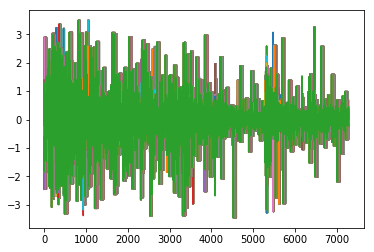

In [52]:
import numpy as np
import pandas as pd
from crypr.build import series_to_supervised, make_single_feature, calc_target
from crypr.util import get_project_path
from os.path import join

maximum_pct_change = 3.5
tx = 72
ty = 1


data = pd.read_csv(join(get_project_path(), 'data', 'raw', 'BTC.csv'), index_col=0)
data = calc_target(data, target='close')['target']
data = series_to_supervised(data, tx, ty, dropnan=True)
data = data[data.abs() < maximum_pct_change].dropna(how='any')
p(data.shape)
p(data.columns.values)
plt.plot(data.values)
plt.show()

(6193, 72)
['var1(t-72)' 'var1(t-71)' 'var1(t-70)' 'var1(t-69)' 'var1(t-68)'
 'var1(t-67)' 'var1(t-66)' 'var1(t-65)' 'var1(t-64)' 'var1(t-63)'
 'var1(t-62)' 'var1(t-61)' 'var1(t-60)' 'var1(t-59)' 'var1(t-58)'
 'var1(t-57)' 'var1(t-56)' 'var1(t-55)' 'var1(t-54)' 'var1(t-53)'
 'var1(t-52)' 'var1(t-51)' 'var1(t-50)' 'var1(t-49)' 'var1(t-48)'
 'var1(t-47)' 'var1(t-46)' 'var1(t-45)' 'var1(t-44)' 'var1(t-43)'
 'var1(t-42)' 'var1(t-41)' 'var1(t-40)' 'var1(t-39)' 'var1(t-38)'
 'var1(t-37)' 'var1(t-36)' 'var1(t-35)' 'var1(t-34)' 'var1(t-33)'
 'var1(t-32)' 'var1(t-31)' 'var1(t-30)' 'var1(t-29)' 'var1(t-28)'
 'var1(t-27)' 'var1(t-26)' 'var1(t-25)' 'var1(t-24)' 'var1(t-23)'
 'var1(t-22)' 'var1(t-21)' 'var1(t-20)' 'var1(t-19)' 'var1(t-18)'
 'var1(t-17)' 'var1(t-16)' 'var1(t-15)' 'var1(t-14)' 'var1(t-13)'
 'var1(t-12)' 'var1(t-11)' 'var1(t-10)' 'var1(t-9)' 'var1(t-8)'
 'var1(t-7)' 'var1(t-6)' 'var1(t-5)' 'var1(t-4)' 'var1(t-3)' 'var1(t-2)'
 'var1(t-1)']


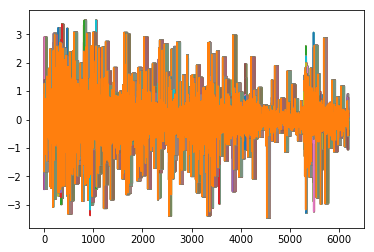

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.15, shuffle=False)
p(X_train.shape)
p(X_train.columns.values)
plt.plot(X_train.values)
plt.show()

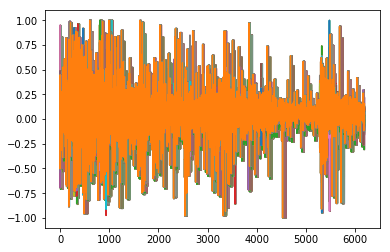

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_train = MinMaxScaler(feature_range=(-1,1)).fit_transform(X_train)
X_test = MinMaxScaler(feature_range=(-1,1)).fit_transform(X_test)
plt.plot(X_train)
plt.show()

In [24]:
# att = build_structured_self_attention_embedder(word_window_size=12, num_features=1,
#                                              hidden_state_size=64, num_layers=1, attention_filters1=96, 
#                                                attention_filters2=96,
#                                              dropout=0.2, recurrent_dropout=0.2, regularization_lambda=1e-4)

In [53]:
att = make_attentive_model(tx=tx, num_channels=1, ty=ty, num_lstm_hidden=64, attention_width=16)
opt = Adam(lr=1e-4)

att.compile(optimizer=opt, loss='mse', metrics=['mae'])
att.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 72, 1)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 72, 64)            16896     
_________________________________________________________________
seq_self_attention_10 (SeqSe (None, 72, 64)            4097      
_________________________________________________________________
flatten_10 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 4609      
Total params: 25,602
Trainable params: 25,602
Non-trainable params: 0
_________________________________________________________________


In [55]:
att.fit(
    np.expand_dims(X_train, axis=-1), 
    y_train, 
    epochs=40, 
    batch_size=128,
    shuffle=True,
    validation_data=(np.expand_dims(X_test, -1), y_test),
)

Train on 6193 samples, validate on 1093 samples
Epoch 1/40
6193/6193 [==============================] - 7s 1ms/step - loss: 0.3511 - mean_absolute_error: 0.3699 - val_loss: 0.0959 - val_mean_absolute_error: 0.1910
Epoch 2/40
6193/6193 [==============================] - 5s 774us/step - loss: 0.3509 - mean_absolute_error: 0.3697 - val_loss: 0.0959 - val_mean_absolute_error: 0.1911
Epoch 3/40
6193/6193 [==============================] - 6s 901us/step - loss: 0.3509 - mean_absolute_error: 0.3698 - val_loss: 0.0960 - val_mean_absolute_error: 0.1912
Epoch 4/40
6193/6193 [==============================] - 5s 753us/step - loss: 0.3509 - mean_absolute_error: 0.3697 - val_loss: 0.0959 - val_mean_absolute_error: 0.1910
Epoch 5/40
6193/6193 [==============================] - 5s 740us/step - loss: 0.3508 - mean_absolute_error: 0.3698 - val_loss: 0.0961 - val_mean_absolute_error: 0.1914
Epoch 6/40
6193/6193 [==============================] - 5s 771us/step - loss: 0.3507 - mean_absolute_error: 0.3697

In [56]:
y_pred = att.predict(np.expand_dims(X_test, axis=-1))

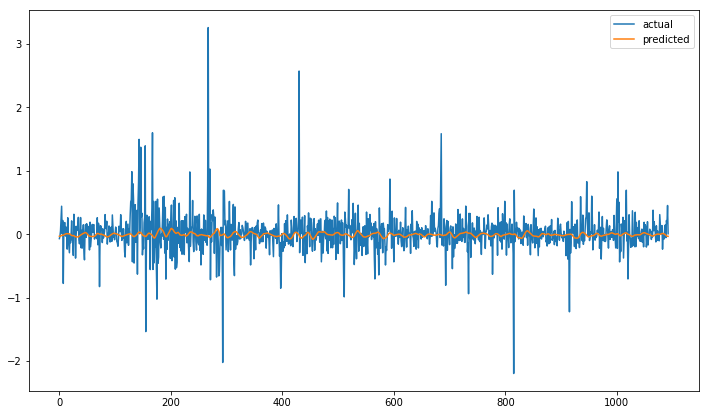

In [57]:
plt.subplots(figsize=(12,7))
plt.plot(y_test.values, label='actual')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
p(test_mae)

0.19158489270205595
